# scratch work

In [1]:
import jax

jax.config.update("jax_enable_x64", True)
import astropy.units as u
import jax.numpy as jnp
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astroquery.jplhorizons import Horizons

from jorbit import Observations, Particle

In [2]:
nights = [Time("2025-01-01 07:00"), Time("2025-01-02 07:00"), Time("2025-01-05 07:00")]

times = []
for n in nights:
    times.extend([n + i * 1 * u.hour for i in range(3)])
times = Time(times)


obj = Horizons(id="274301", location="695@399", epochs=times.utc.jd)
pts = obj.ephemerides(extra_precision=True, quantities="1")

coords = SkyCoord(pts["RA"], pts["DEC"], unit=(u.deg, u.deg))
times = Time(pts["datetime_jd"], format="jd", scale="utc")

[Text(0.5, 0, 'RA'), Text(0, 0.5, 'DEC')]

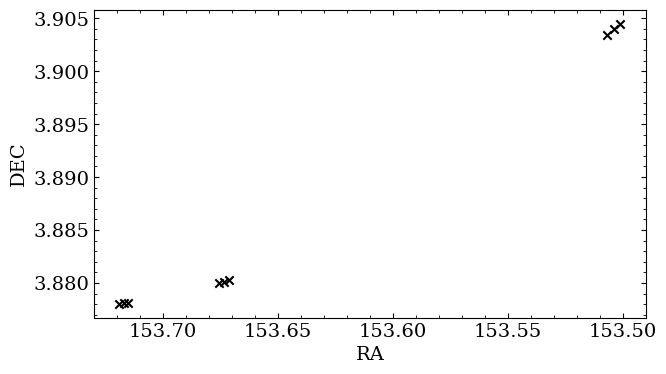

In [3]:
fig, ax = plt.subplots()
ax.scatter(coords.ra, coords.dec, c="k", marker="x")
ax.set_xlim(ax.get_xlim()[::-1])
ax.set(xlabel="RA", ylabel="DEC")

In [4]:
obs = Observations(
    observed_coordinates=coords,
    times=times,
    observatories="kitt peak",
    astrometric_uncertainties=1 * u.arcsec,
)
obs

Observations with 9 set(s) of observations

In [19]:
obj = Horizons(id="274301", location="500@0", epochs=times.tdb.jd[0])
vecs = obj.vectors(refplane="earth")
true_x0 = jnp.array([vecs["x"], vecs["y"], vecs["z"]]).T[0]
true_v0 = jnp.array([vecs["vx"], vecs["vy"], vecs["vz"]]).T[0]
true_x0, true_v0

(Array([-2.00572335,  1.77860137,  0.5197407 ], dtype=float64),
 Array([-0.00665991, -0.00662871, -0.00203885], dtype=float64))

In [20]:
p0 = Particle(x=true_x0, v=true_v0, time=times[0], name="274301 Wikipedia")
p0

Particle: 274301 Wikipedia

In [21]:
print(p0.cartesian_state)
print(p0.keplerian_state)

CartesianState(x=Array([[-2.00572335,  1.77860137,  0.5197407 ]], dtype=float64), v=Array([[-0.00665991, -0.00662871, -0.00203885]], dtype=float64), time=np.float64(2460676.792467407))
KeplerianState(semi=Array([2.37859645], dtype=float64), ecc=Array([0.14924503], dtype=float64), inc=Array([6.73363769], dtype=float64), Omega=Array([183.37295038], dtype=float64), omega=Array([140.26385356], dtype=float64), nu=Array([173.65462829], dtype=float64), time=np.float64(2460676.792467407))
